<a href="https://colab.research.google.com/github/TiagoIesbick/api-little-lemon/blob/master/binary_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

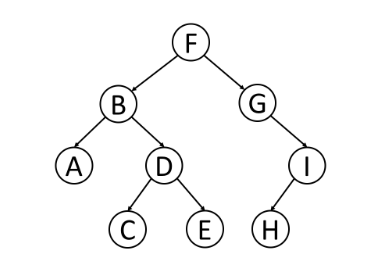

In [1]:
from collections import deque

# Binary Tree

pre_order_traversal = []
in_order_traversal = []
post_order_traversal = []
level_order_traversal = []

class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def pre_order(node):
  ''' root -> left -> right '''
  if node:
    n = node.val
    e = node.left.val if node.left else None
    d = node.right.val if node.right else None
    print(n,e,d)
    print('visited', node.val)
    pre_order_traversal.append(node.val)
    pre_order(node.left)
    pre_order(node.right)

def in_order(node):
  ''' left -> root -> right '''
  if node:
    n = node.val
    e = node.left.val if node.left else None
    d = node.right.val if node.right else None
    print(n,e,d)
    in_order(node.left)
    print('visited', node.val)
    in_order_traversal.append(node.val)
    in_order(node.right)

def post_order(node):
  ''' left -> right -> root '''
  if node:
    n = node.val
    e = node.left.val if node.left else None
    d = node.right.val if node.right else None
    print(n,e,d)
    post_order(node.left)
    post_order(node.right)
    print('visited', node.val)
    post_order_traversal.append(node.val)

def level_order(node):
  ''' level by level '''
  if node:
    queue = deque([node])

    while queue:
      level_size = len(queue)
      level = []

      for _ in range(level_size):
        node = queue.popleft()
        level.append(node.val)
        if node.left: queue.append(node.left)
        if node.right:queue.append(node.right)

      level_order_traversal.append(level)



root = Node("F")
root.left = Node("B")
root.right = Node("G")
root.left.left = Node("A")
root.left.right = Node("D")
root.left.right.left = Node("C")
root.left.right.right = Node("E")
root.right.right = Node("I")
root.right.right.left = Node("H")

pre_order(root)
print(pre_order_traversal)
in_order(root)
print(in_order_traversal)
post_order(root)
print(post_order_traversal)
level_order(root)
print(level_order_traversal)

F B G
visited F
B A D
visited B
A None None
visited A
D C E
visited D
C None None
visited C
E None None
visited E
G None I
visited G
I H None
visited I
H None None
visited H
['F', 'B', 'A', 'D', 'C', 'E', 'G', 'I', 'H']
F B G
B A D
A None None
visited A
visited B
D C E
C None None
visited C
visited D
E None None
visited E
visited F
G None I
visited G
I H None
H None None
visited H
visited I
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
F B G
B A D
A None None
visited A
D C E
C None None
visited C
E None None
visited E
visited D
visited B
G None I
I H None
H None None
visited H
visited I
visited G
visited F
['A', 'C', 'E', 'D', 'B', 'H', 'I', 'G', 'F']
[['F'], ['B', 'G'], ['A', 'D', 'I'], ['C', 'E', 'H']]


In [ ]:
max_depth = float('-inf')
def top_down_max_depth(root, depth):
  if not root:
    return
  if not root.left and not root.right:
    global max_depth
    max_depth = max(max_depth, depth)
  top_down_max_depth(root.left, depth + 1)
  top_down_max_depth(root.right, depth + 1)
  return max_depth


def bottom_up_max_depth(root):
  if not root:
    return 0
  left_depth = bottom_up_max_depth(root.left)
  right_depth = bottom_up_max_depth(root.right)

  return max(left_depth, right_depth) + 1


print(top_down_max_depth(root, 1))
print(bottom_up_max_depth(root))


4
4


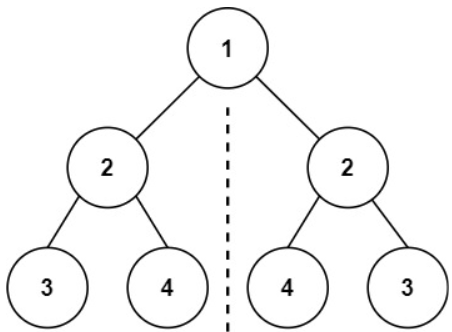

In [ ]:
root = Node(1)
root.left = Node(2)
root.right = Node(2)
root.left.left = Node(3)
root.left.right = Node(4)
root.right.left = Node(4)
root.right.right = Node(3)

In [ ]:
# Recursive Symmetry Check
def is_symmetric_recursive(root):
    def is_mirror(t1, t2):
        if not t1 and not t2:
            return True  # both are None
        if not t1 or not t2:
            return False  # one is None, one is not
        return (
            t1.val == t2.val and
            is_mirror(t1.left, t2.right) and
            is_mirror(t1.right, t2.left)
        )

    return is_mirror(root, root)


# Iterative version with queue (BFS-style)
def is_symmetric_iterative(root):
    if not root:
        return True

    queue = deque([(root.left, root.right)])

    while queue:
        t1, t2 = queue.popleft()

        if not t1 and not t2:
            continue
        if not t1 or not t2 or t1.val != t2.val:
            return False

        queue.append((t1.left, t2.right))
        queue.append((t1.right, t2.left))

    return True

print(is_symmetric_recursive(root))
print(is_symmetric_iterative(root))

True
True


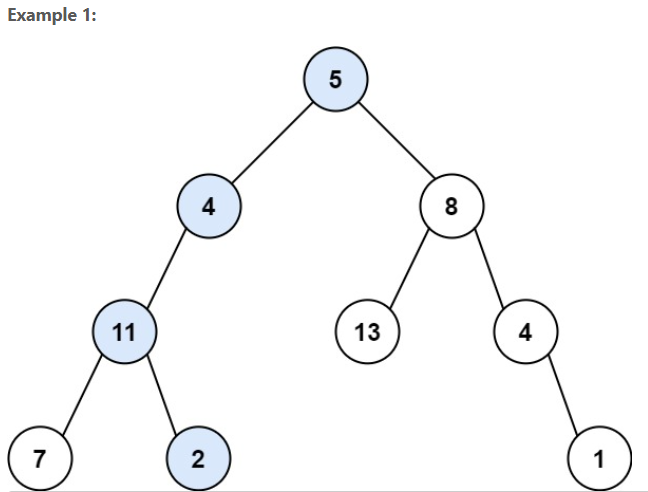

In [ ]:
root = Node(5)
root.left = Node(4)
root.right = Node(8)
root.left.left = Node(11)
root.right.left = Node(13)
root.right.right = Node(4)
root.left.left.left = Node(7)
root.left.left.right = Node(2)
root.right.right.right = Node(1)

In [ ]:
def hasPathSum(root, targetSum):
  if not root:
    return False
  if not root.left and not root.right:
    return targetSum == root.val
  return hasPathSum(root.left, targetSum - root.val) or hasPathSum(root.right, targetSum - root.val)

In [ ]:
print(hasPathSum(root, 22))

True


# Construct Binary Tree from Traversal

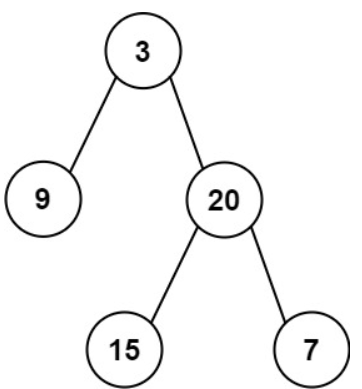

In [42]:
root = Node(3)
root.left = Node(9)
root.right = Node(20)
root.right.left = Node(15)
root.right.right = Node(7)

In [43]:
pre_order = []
in_order = []
post_order = []

def preorder(root):
  if not root:
    return
  pre_order.append(root.val)
  preorder(root.left)
  preorder(root.right)

def inorder(root):
  if not root:
    return
  inorder(root.left)
  in_order.append(root.val)
  inorder(root.right)

def postorder(root):
  if not root:
    return
  postorder(root.left)
  postorder(root.right)
  post_order.append(root.val)

preorder(root)
inorder(root)
postorder(root)
print(pre_order)
print(in_order)
print(post_order)

[3, 9, 20, 15, 7]
[9, 3, 15, 20, 7]
[9, 15, 7, 20, 3]


In [44]:
# from Inorder and Postorder Traversal
def buildTreeInPost(in_order, post_order):
  inorder_idx = {val:idx for idx, val in enumerate(in_order)}

  def helper(left, right):
    if left > right:
      return None
    root = Node(post_order.pop())
    idx = inorder_idx[root.val]
    root.right = helper(idx+1, right)
    root.left = helper(left, idx-1)
    return root

  return helper(0, len(in_order)-1)


# from Preorder and Inorder Traversal
def buildTreePreIn(pre_order, in_order):
  inorder_idx = {val:idx for idx, val in enumerate(in_order)}

  def helper(left, right):
    if left > right:
      return None
    root = Node(pre_order.pop(0))
    idx = inorder_idx[root.val]
    root.left = helper(left, idx-1)
    root.right = helper(idx+1, right)
    return root

  return helper(0, len(in_order)-1)

root_tree_in_post = buildTreeInPost(in_order, post_order)
root_tree_pre_in = buildTreePreIn(pre_order, in_order)

In [45]:
in_order, post_order = [], []
inorder(root_tree_in_post)
postorder(root_tree_in_post)
print(in_order)
print(post_order)

in_order, pre_order = [], []
inorder(root_tree_pre_in)
preorder(root_tree_pre_in)
print(in_order)
print(pre_order)

[9, 3, 15, 20, 7]
[9, 15, 7, 20, 3]
[9, 3, 15, 20, 7]
[3, 9, 20, 15, 7]


# Populating Next Right Pointers in Each Node

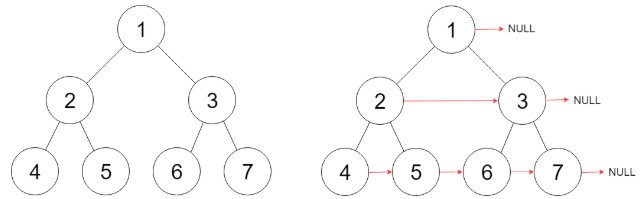

In [47]:
class Node:
    def __init__(self, val: int = 0, left: 'Node' = None, right: 'Node' = None, next: 'Node' = None):
        self.val = val
        self.left = left
        self.right = right
        self.next = next

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)


def queue_connect(root):
  if not root:
    return None
  queue = deque([root])

  while queue:
    level_size = len(queue)
    prev = None  # reset for each level

    for _ in range(level_size):
        node = queue.popleft()

        # Connect previous node to current
        if prev:
            prev.next = node
        prev = node

        if node.left: queue.append(node.left)
        if node.right: queue.append(node.right)

    # last node in this level points to None (already default)

  return root


def connect(root):
  if not root:
    return None

  leftmost = root
  while leftmost.left:  # stop at leaves
      head = leftmost
      while head:
          # Connect children of same parent
          head.left.next = head.right

          # Connect across parents
          if head.next:
              head.right.next = head.next.left

          head = head.next
      leftmost = leftmost.left  # go to next level

  return root

print(queue_connect(root))